In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploratory Data Analysis

## Table of contents:

- Load the data and check shape of the dataset , missing values and feature types.
- Try framing questions based on each analysis and check if the data is able to answer it.
- Get basic stats of the main dataset to get further insights.

# Load data from the given csv file and perform basic Analysis

## Starter questions to refer:

- What's the shape of the dataset?
- How many columns does it have?

In [3]:
# Store the url in a variable to be used for loading
csv_path = '/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv'

# Load the csv using the variable
accident_df = pd.read_csv(csv_path)

In [4]:
# Display the shape of the loaded dataframe
print("The given dataset has {} rows and {} columns \n".format(accident_df.shape[0], accident_df.shape[1]))

# Display the columns of the dataframe
print("Has following columns \n {}".format(accident_df.columns))

The given dataset has 1516064 rows and 47 columns 

Has following columns 
 Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


# Check for any missing entries and divide the dataset into categorical and numercial entries

## Todos:

- Get the sum of entries per column using isnull()
- Get the columns that are categorical in nature and the ones that are numeric 

In [5]:
accident_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

## Observations:

- There are missing entries present for most of the columns.
- The column "Number" has the highest number of missing entries, it indicates the street number where the accident occured.
- This could mean two things what come to mind:
    - When the address was being noted down , the record could have been made based on the locality and not on street number.
    - The address doesn't have a street number in place.

## Questions:

- Can we compare the addresses of few samples having missing street numbers and conclude whether they do have no street numbers? (Hint - Use Hypothesis testing)

## Top 5 Missing values by percentage

- Using simple line graph to figure the top 5 columns having missing entries by percent.

- As observed above , the 'Number' column has approx 70% missing entries , which is basically the street number of an address.

- Others include precipitation, wind chill, wind speed and humidity.

- If a dataset has close to million entries , which this one does (~1.5 mn) , dropping missing entries for features having more than 30% is ok.

- If a feature has more than 50% missing entries , we can check if its of any use before dropping it , else we can fix the missing entries.

<AxesSubplot:title={'center':'Top 5 Features with missing entries'}, xlabel='Features', ylabel='Percentage'>

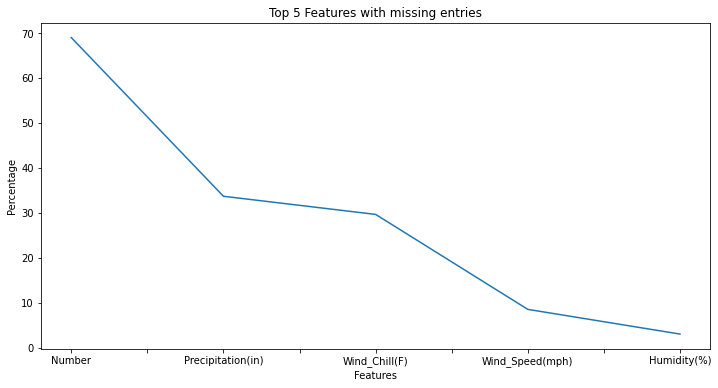

In [6]:
plt.figure(figsize = (12,6))
plt.title('Top 5 Features with missing entries')
plt.xlabel('Features')
plt.ylabel('Percentage')
(accident_df.isnull().sum().sort_values(ascending=False)/ len(accident_df) * 100).head(5).plot()

In [7]:
# Group columns based on categorical / numerical for further analysis
# Start with getting the datatypes of each column
accident_df.dtypes
# Has 4 categories - int, float, bool, object

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

## Conclusions:

- There are four dataypes present in this dataset, of types (int, float, bool, object)
- What we can do is create separate dataframes to contain the categorical ones (bool , object) and the numerical ones (int, float) for further analyzing these variables,

In [8]:
# Make use of the following method in pandas - select_dtypes , refer - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# Get only numerical features in one dataframe
accident_df_num = accident_df.select_dtypes(include=['int64', 'float64'])
accident_df_num_cols = accident_df_num.columns.tolist()

accident_df_num_cols

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [9]:
# Get only numerical features in one dataframe
accident_df_cat = accident_df.select_dtypes(include=['bool', 'object'])
accident_df_cat_cols = accident_df_cat.columns.tolist()

accident_df_cat_cols

['ID',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

## Points to note so far:

- We have checked the shape of the dataset (accident_df) to get an idea of how many entries and columns are there.
- We checked for missing values for the columns specified and have prepared some questions to later ponder on.
- Got an idea of the type of variables in the dataframe and divided them into categorical and numerical dataframes for further anlysis.

## Variables created so far:

- accident_df = parent dataframe
- accident_df_num = Contains numerical features
- accident_df_cat = Contains categorical features
- accident_df_num_cols = Contains list of columns for accident_df_num
- accident_df_cat_cols = Contains list of columns for accident_df_cat

# How's the stats for each feature?

In [10]:
accident_df_num.describe().applymap('{:,.2f}'.format)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,"1,516,064.00","1,516,064.00","1,516,064.00","1,516,064.00","1,516,064.00","1,516,064.00","469,969.00","1,473,031.00","1,066,748.00","1,470,555.00","1,479,790.00","1,471,853.00","1,387,202.00","1,005,515.00"
mean,2.24,36.90,-98.60,36.90,-98.60,0.59,"8,907.53",59.58,55.11,64.66,29.55,9.13,7.63,0.01
std,0.61,5.17,18.50,5.17,18.50,1.63,"22,421.90",18.27,21.13,23.26,1.02,2.89,5.64,0.13
min,1.00,24.57,-124.50,24.57,-124.50,0.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.85,-118.21,33.85,-118.21,0.00,"1,212.00",47.00,40.80,48.00,29.44,10.00,4.60,0.00
50%,2.00,37.35,-94.38,37.35,-94.38,0.18,"4,000.00",61.00,57.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.87,40.73,-80.87,0.59,"10,100.00",73.00,71.00,84.00,30.04,10.00,10.40,0.00
max,4.00,49.00,-67.11,49.08,-67.11,155.19,"9,999,997.00",170.60,113.00,100.00,58.04,140.00,984.00,24.00


## Findings:

- Wrt the distance feature , we can see that the minimum is 0 miles and maximum is 155 miles, thereby giving us an idea that there are point accidents as well

- On referring the distance feature with the Start Lat, Start Lng, End Lat, End Lng, there are no missing entries and that for point accidents , the start and end coordinates could be inputted as same , ie Start(Lat/Lng) = End(Lat/Lng)

## Questions:
- Given that these accidents occured over a range of temperatures , do more accidents occur in warmer areas or colder areas?

- Which state has the highest number of accidents (Top 5)?

- Are highly poulated states more prone to accidents (Need to refer using external data as there's no population feature)

## Data Visualization:

- With so many questions that we were able to frame so far , are we able to get answers with raw numbers?

- How about we try to improve on the conclusions with visualizations? As it has been said :

> Pictures speak louder than words !!!

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

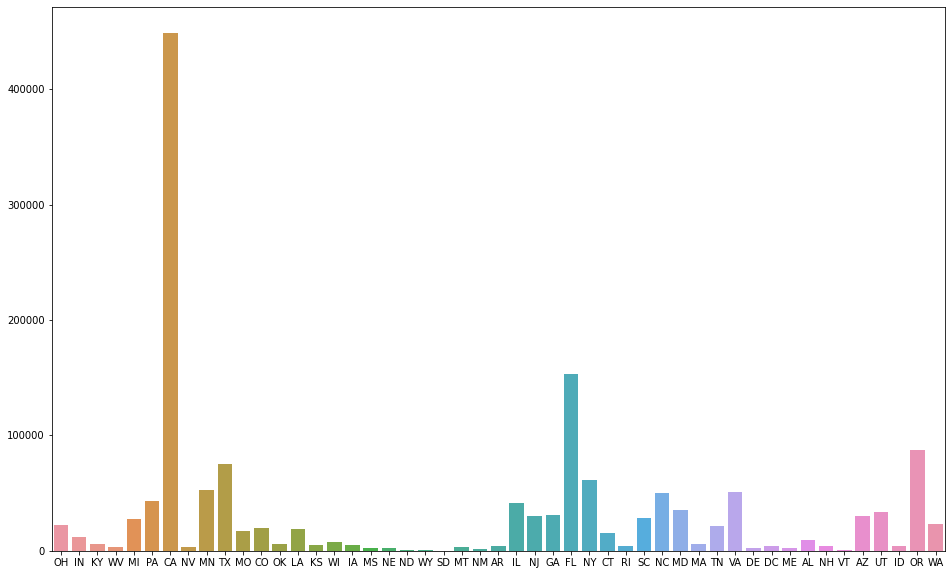

In [11]:
states = accident_df.State.unique()

count_by_state = []

for state in accident_df.State.unique():
    count_by_state.append(accident_df[accident_df['State'] == state].count()['ID'])
    
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(states, count_by_state)

## Observations:

- Per the graph, with the given data, we can see that the top 5 states having the most number of accidents are:
    - California
    - Florida
    - Oregon
    - Texas
    - NewYork
    
### Referring external data to validate correctness of the given sample:
[List of states by population](https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1)

- If we check the first 5 states in the above link , they're (CA, TX, FL, NY, PA)

- Referring the above sample , barring Pennsylvania (PA) and Oregon (OR), other 3 are truly populous and do have a higher number of accidents.

- Thereby mentioning the facts that this data could be somewhat innacurate given that we used the accident ID's and the state codes given to conlude the findings.

- Also , owing to the fact that the collected data doesn't have any missing entries for State and ID feature, we are unable to reject the null hypothesis aka "Population is a determining factor for accidents"

- i.e. The highly populated states do have higher chances of accidents


Text(564.2857142857143, 0.5, 'Start Longitude')

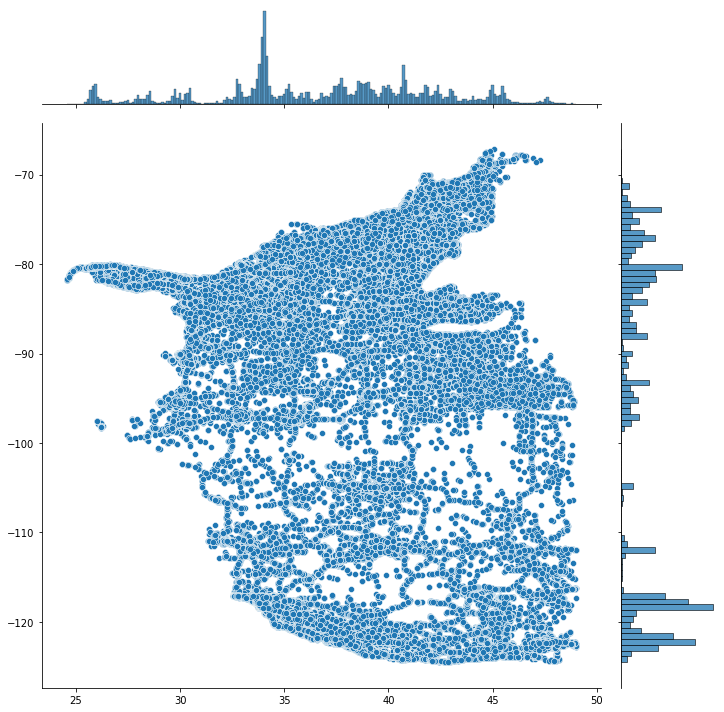

In [12]:
sns.jointplot(x=accident_df.Start_Lat.values, y=accident_df.Start_Lng.values, height=10)
plt.xlabel('Start Latitude')
plt.ylabel('Start Longitude')

Text(564.2857142857143, 0.5, 'End Longitude')

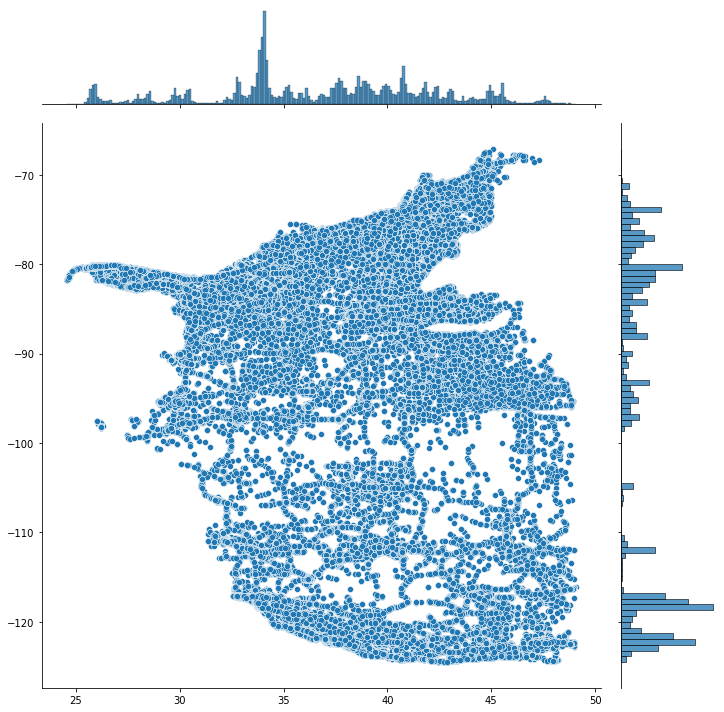

In [13]:
sns.jointplot(x=accident_df.End_Lat.values, y=accident_df.End_Lng.values, height=10)
plt.xlabel('End Latitude')
plt.ylabel('End Longitude')

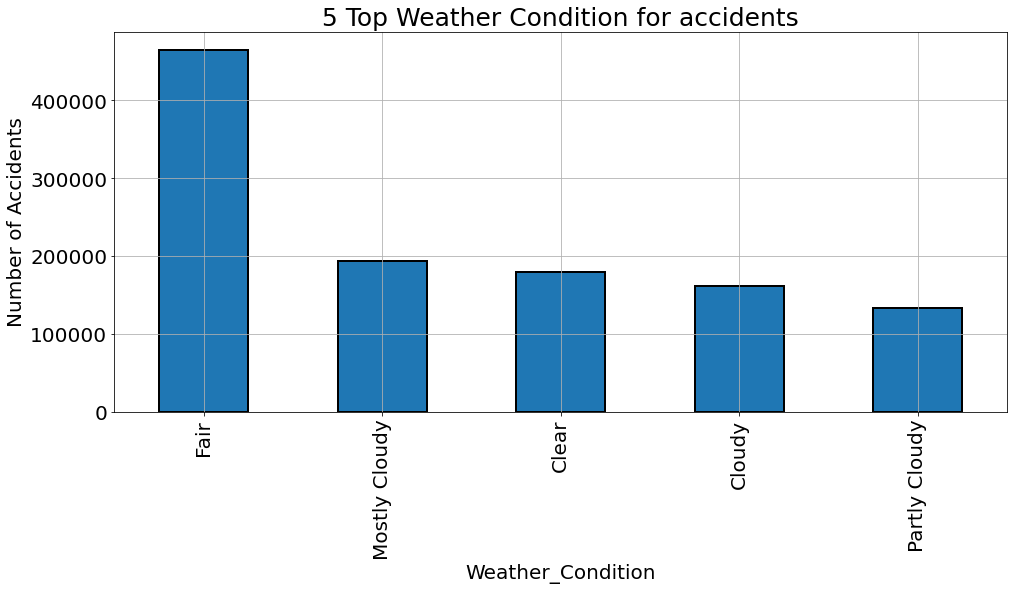

In [14]:
fig, ax=plt.subplots(figsize=(16,7))
accident_df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

## Observations:

- Could be due to limitation in data gathering , or due to other factors influencing the accidents to occur , its strange to see more accidents occuring in Fair Weather conditions.

- Second category 'Mostly Cloudy' makes sense , since rain does increase chances of accidents by skidding etc.




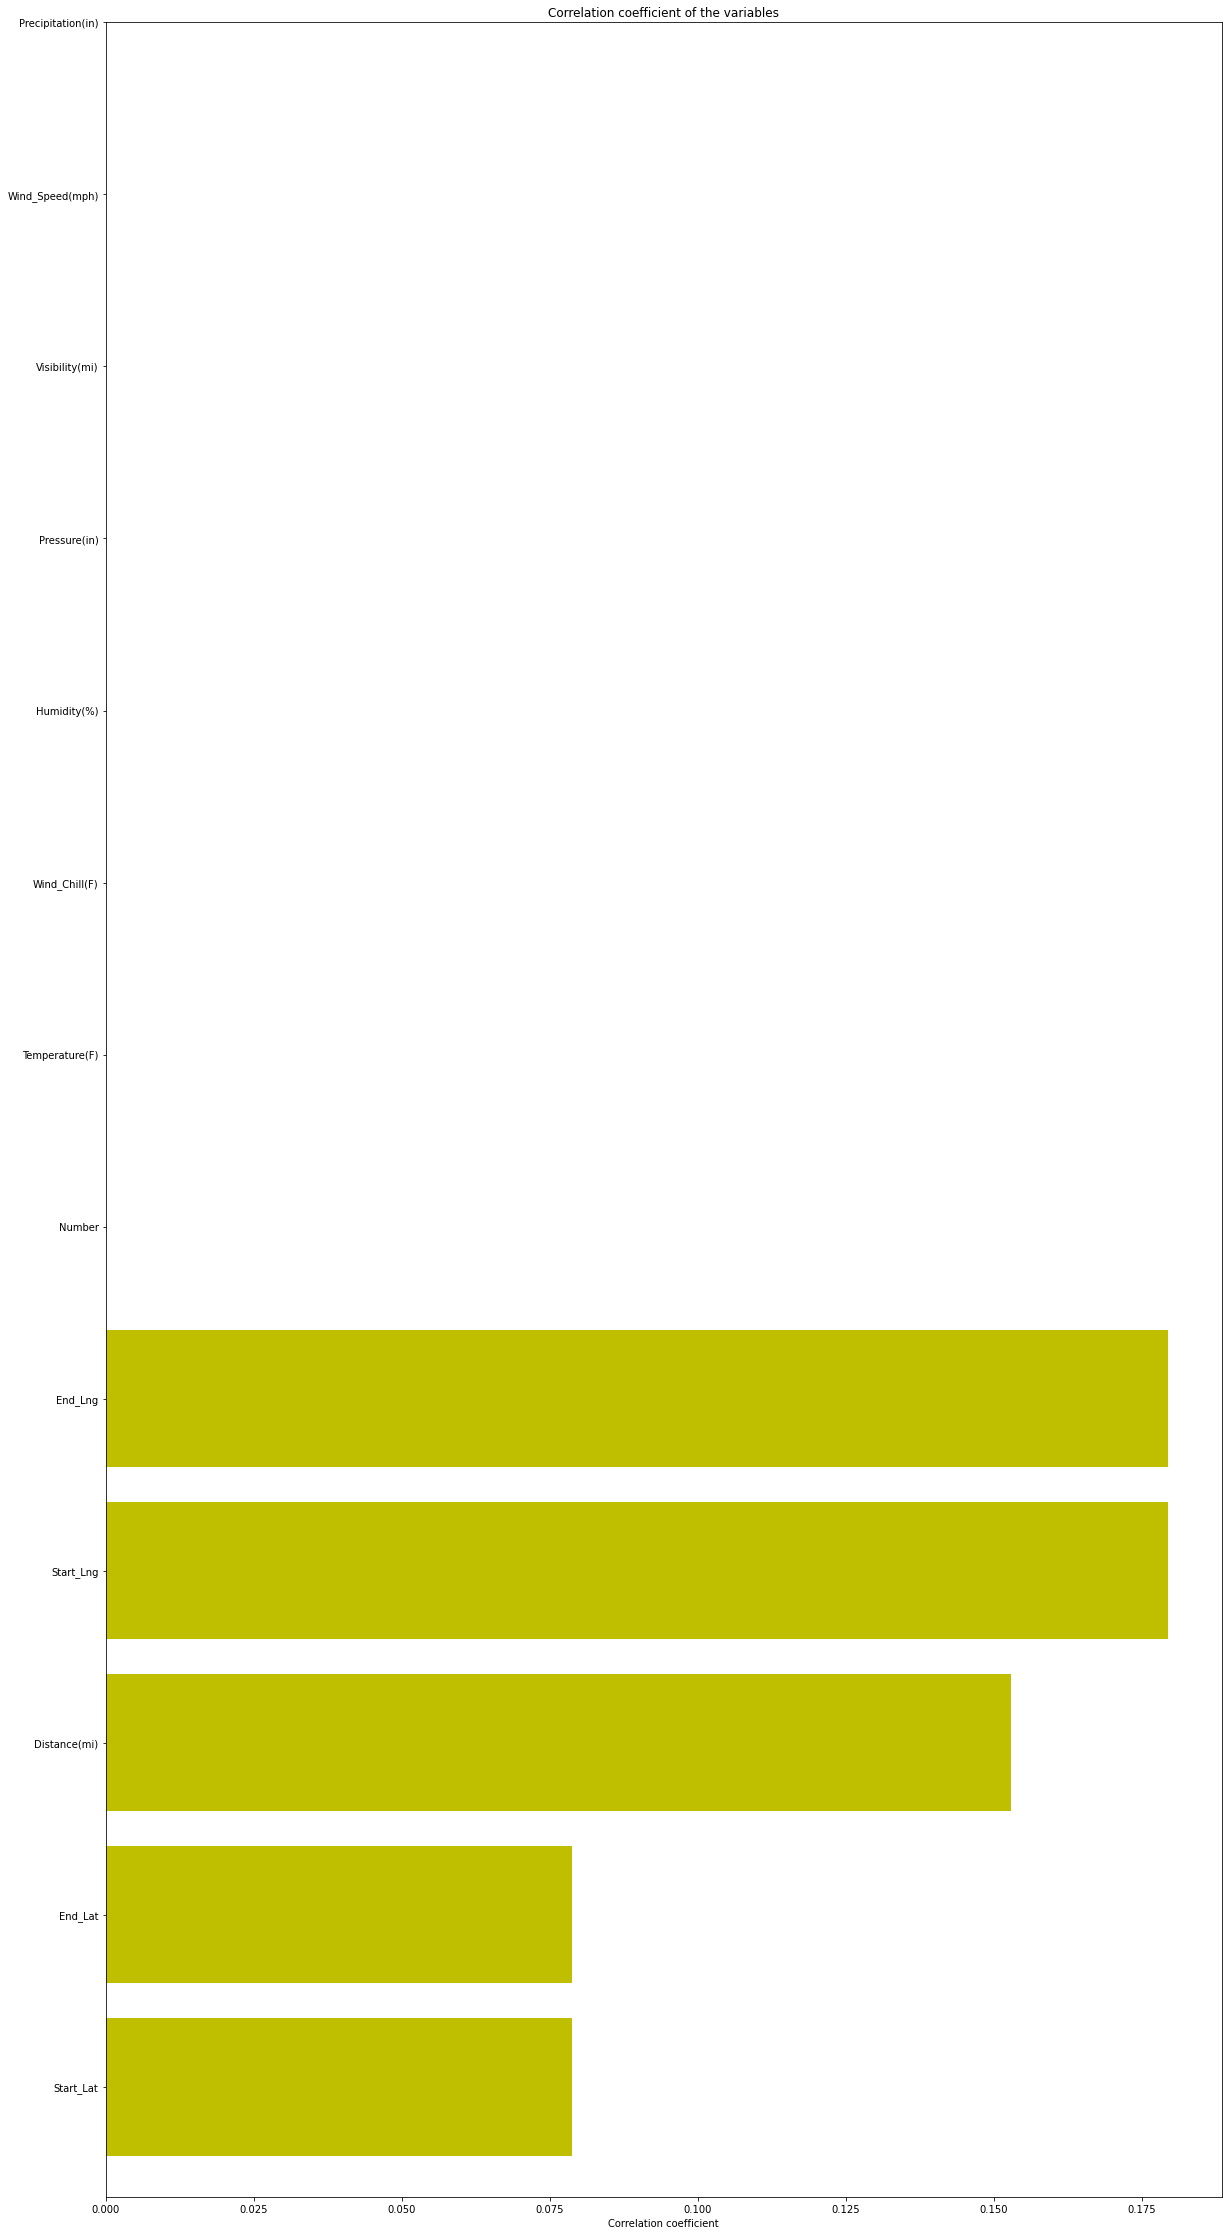

In [15]:
# Get only float features
float_cols = [col for col in accident_df.columns if col not in ['Severity'] if accident_df[col].dtype=='float64']

labels = []
values = []

for col in float_cols:
    '''
    Add the floating point featues to labels list.
    Add the correlation coeff outputs to the values list wrt Severity (float feature v/s severity)
    '''
    labels.append(col)
    values.append(np.corrcoef(accident_df[col].values, accident_df['Severity'].values)[0, 1])
# Concat the lists to create a dataframe
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')


features = np.arange(len(labels))
width = 0.9

fig, ax = plt.subplots(figsize=(20, 40))
rects = ax.barh(features, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(features)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

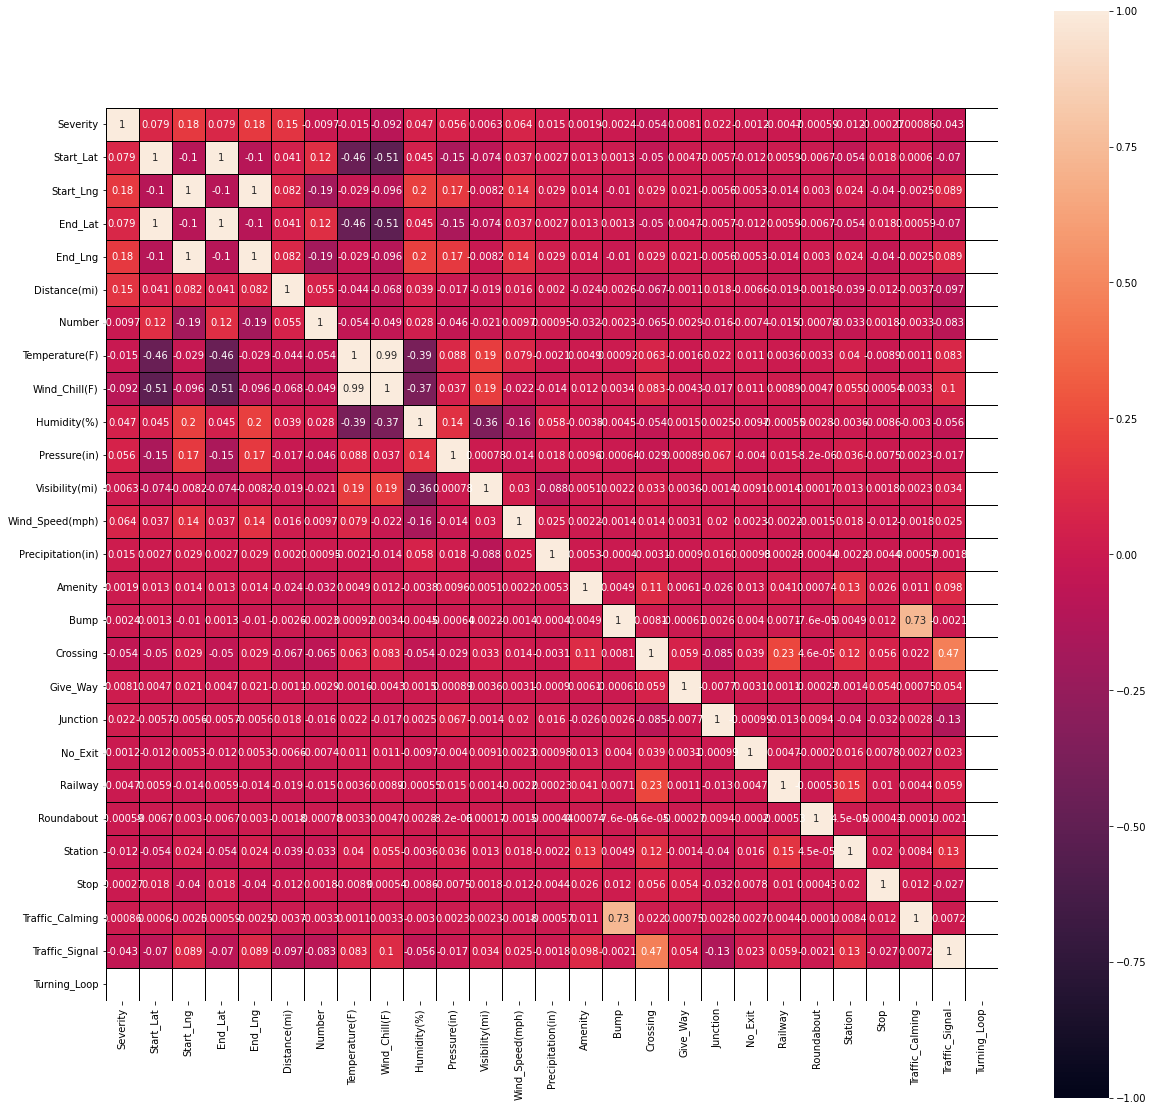

In [16]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig = sns.heatmap(
    accident_df.corr(), 
    annot=True, 
    linewidths=1, 
    linecolor='k', 
    square=True, 
    mask=False, 
    vmin=-1, 
    vmax=1,
    cbar_kws={'orientation':'vertical'},
    cbar=True
)

## Observations:

- Positively correlated features involve the following pairs :
    - Traffic Calming and Bump
        - This is expected as higher the occurence of bumps nearby , the lesser the chances of accidents due to speed reduction.
    - Traffic Signal and Crossing
        - This is logically correct too as crossings do have traffic signals , be it railway crossing or road intersections.
        
- Negatively correlated features involve the following pairs:
    - Temperature and Humidity
        - Could indicate more entries for the arid zones as there's dry heat in those places, although there's data for coastal zones as well (refer above scatter plot)
    - Wind Chill and Humidity
        - This is expected as colder the wind , lesser humid the weather will be.
    - Visibility and Humidity
        - This is expected too as humid weather doesn't influence visibility positively.
        - For lower humid areas , this could mean lower visibility due to mirage effect in desert areas.

## Parting words and Future Improvements that can be done:

- The above dataset was analyzed based on the following:
    - What all features are more indicative of an accident to occur given the existing data.
    - Whether population density is related to higher accident count which is found out to be yes, based on hypothesis testing.
    - If there are any correlated feature pairs (logically analyzing) positive or negative and whether the data does enough to justify the same?
    
    
- Future Improvements that can be tried out:
    - Given that we were able to get a list of features that are correlated , we can further proceed with feature selection.
    - We can further formulate this dataset into a supervised (regression/ classification) problem or even into an unsupervised one !
    - Anyone with domain expertise in this area can further define significance values for hypothesis testing to better understand the samples and conclude the findings in a more improved way than what was done above.
    - There are many other variables that were left to be analyzed that can be checked for and problem statements can be tuned to fit the same:
        - Few examples:
            - Do the traffic conditions reduce / worsen the occurence of accidents?
            - What time of month was more accident occurences observed?
            - What day of the week were more accidents observed?
            - Wordcloud analysis on top 5 locations based on 'street' feature. And can we use the observations to reduce the accident occurence?
        - Maybe there are more questions that might be better created than the ones that I have mentioned above, and these observations can then be further used to give meaningful conclusions which can help in one way or other.
        
